In [1]:
#### Importing the libraries ----
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
### Loading the dataset ----
data = pd.read_csv('C:/Users/Pc/OneDrive/Pictures/Data science assignments/week 13/b88assignments/Project - 3&4_Multiple_Reg/Project - 3&4_Multiple_Reg/50_startups.csv', sep = ',')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
# Making a copy of the dataset
df = data.copy()
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA and Data Visualisation

In [4]:
# Printing the summary of the DataFrame's structure and content.
print("Summary of the DataFrame's structure and content-------")
df.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#### Exploratory Data Analysis
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [6]:
# Checking for any duplicated columnsor rows
df[df.duplicated()] # No duplicated data

,R&D Spend,Administration,Marketing Spend,State,Profit


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
# Correlation Analysis
df.corr()

C:\Users\Pc\AppData\Local\Temp\ipykernel_6672\1567030299.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
print("The skewness of the Profit column is",round(df['Profit'].skew(),2),"which shows a Symmetric skewness as it is close to 0.")
print("Descriptive statistics of the Profit column of DataFrame-\n",round(df['Profit'].describe(),2))

The skewness of the Profit column is 0.02 which shows a Symmetric skewness as it is close to 0.
Descriptive statistics of the Profit column of DataFrame-
 count        50.00
mean     112012.64
std       40306.18
min       14681.40
25%       90138.90
50%      107978.19
75%      139765.98
max      192261.83
Name: Profit, dtype: float64


In [10]:
print("The skewness of the dataset is as follows - ")
print(df.skew())

The skewness of the dataset is as follows - 
R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64


C:\Users\Pc\AppData\Local\Temp\ipykernel_6672\2002512794.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.skew())


### The above skewness of the different columns show that the Administration and Marketing Spend are Left-Skewed while R&D Spend is Right_skewed and the Profit column is Symmetric.

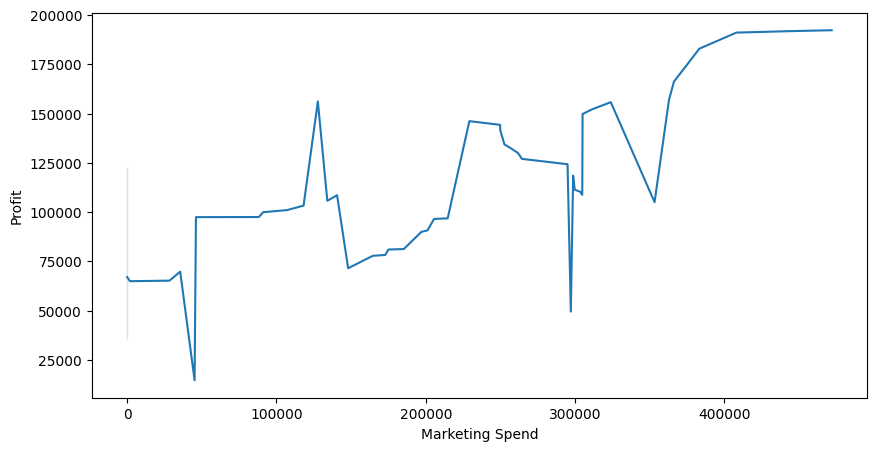

Inference - The line graph shows an increase in the profit with an increase in the money spent on Marketing,but there is 
fluctuation in the data even with the increase.


In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'Marketing Spend', y = 'Profit', data = df)
plt.savefig("Lineplot between marketing spend and Profit.png")
plt.show()
print("Inference - The line graph shows an increase in the profit with an increase in the money spent on Marketing,but there is ")
print("fluctuation in the data even with the increase.")

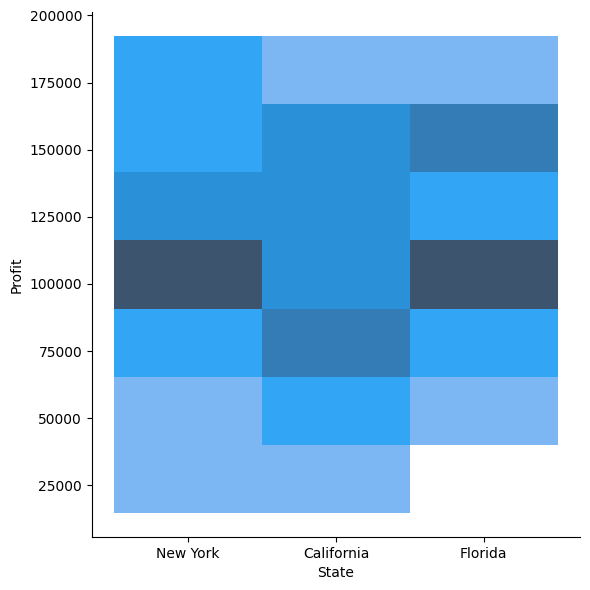

In [31]:
sns.displot(x = 'State', y = 'Profit', data = df, height=6)
plt.savefig("displot.png")
plt.show()

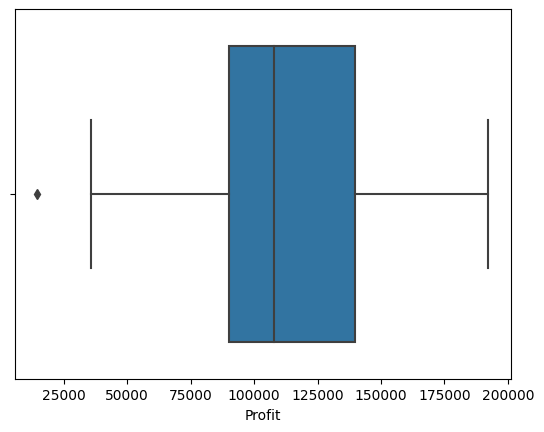

In [32]:
sns.boxplot(x = df['Profit'])
plt.savefig("Boxplot of Profit.png")
plt.show()

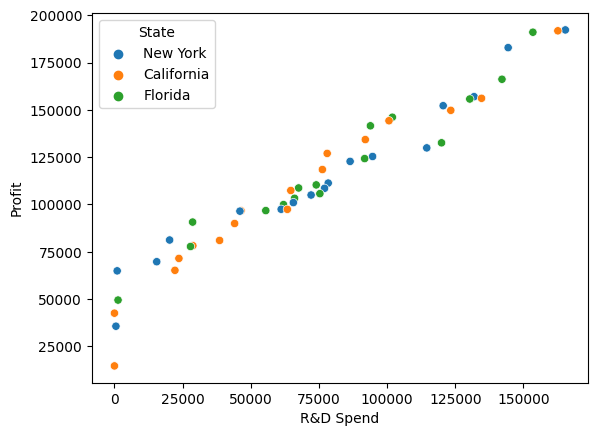

Inference - The scatterplot shows a directly proportional relationship between R&D Spend and Profit,
as the spending on R&D increases, the Profit also increases.


In [33]:
sns.scatterplot(x = 'R&D Spend', y = 'Profit',hue = 'State',data = df)
plt.savefig("Scatter plot.png")
plt.show()
print("Inference - The scatterplot shows a directly proportional relationship between R&D Spend and Profit,")
print("as the spending on R&D increases, the Profit also increases.")

## Making a Multiple Linear Regression Model

In [15]:
# Printing the columns name for reference
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [16]:
X = df[['R&D Spend','Administration','Marketing Spend']]
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [17]:
y = df['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [18]:
##### Sampling the data  --- 
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.75,random_state=1234)

In [20]:
X_train.head(2)

,R&D Spend,Administration,Marketing Spend
22,73994.56,122782.75,303319.26
31,61136.38,152701.92,88218.23


In [21]:
model = LinearRegression()
model_train = model.fit(X_train,y_train)

In [22]:
pred1 = model_train.predict(X_test)
pred1

array([ 90194.17952859,  47903.86317918, 157971.04228085,  64605.59921633,
       127374.72377663,  75336.89015199, 151460.24911699, 101696.75527592,
       172199.85553484,  48486.71965158, 117054.2877853 , 129019.52034704,
       135580.08409505])

In [23]:
dd  = pd.DataFrame(pred1, columns = ['Predicted'])

In [24]:
dd['Actual'] = y_test.values

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from math import sqrt

In [26]:
round(sqrt(mean_squared_error(dd['Actual'], dd['Predicted'])))

12167

In [27]:
print("The Strength of the Model is - ",round(r2_score(dd['Actual'], dd['Predicted']), 2))  #### # Strendth of the Model

The Strength of the Model is -  0.92


## Saving the Model -----

In [28]:
import joblib

In [29]:
filename = 'joblib_startup_reg_model.sav'
joblib.dump(model_train,filename)

['joblib_startup_reg_model.sav']